## Uploading, extracting and plotting data from a `nosql`

#### This nosql deta base is hosted via https://web.deta.sh/home/jameshtwose/example_db/bases/example_deta_base

In [1]:
# read in necessary functions
from deta import Deta
import numpy as np
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os
import seaborn as sns

In [2]:
load_dotenv(find_dotenv())

True

In [3]:
# initialize with a project key
deta = Deta(os.environ["example_db_deta_project_key"])

In [4]:
# create the deta Base
example_db = deta.Base("example_deta_base")

In [5]:
# Upload example data from an open repository
_df = pd.read_csv("https://raw.githubusercontent.com/jameshtwose/jms_fitbit_analyses/eda/DS/MyFitbitData/JamesTwose/Physical%20Activity/heart_rate_per_hour.csv")
df = (_df
 .assign(**{"date": lambda d: pd.to_datetime(d["dateTime"]).dt.date.astype(str)})
 .groupby("date")
 .mean()
 .round(2)
 .reset_index()
 .rename(columns={"bpm": "mean_bpm", "confidence": "mean_confidence"})
 )

In [6]:
inserted_values = [example_db.insert(data=row_to_insert) for row_to_insert in df.to_dict(orient="records")]
inserted_values

[{'date': '2020-12-31',
  'key': 'z0zocui27zi6',
  'mean_bpm': 89.29,
  'mean_confidence': 1.86},
 {'date': '2021-01-01',
  'key': 'l9krrctsoxx8',
  'mean_bpm': 76.68,
  'mean_confidence': 2.08},
 {'date': '2021-01-02',
  'key': 'rkxjlznt1tk5',
  'mean_bpm': 74.02,
  'mean_confidence': 2.36},
 {'date': '2021-01-03',
  'key': 'pc2njrew5e98',
  'mean_bpm': 81.56,
  'mean_confidence': 2.24},
 {'date': '2021-01-04',
  'key': 'v1sfuj1qi3d5',
  'mean_bpm': 77.08,
  'mean_confidence': 2.16},
 {'date': '2021-01-05',
  'key': '5zlos8waqv63',
  'mean_bpm': 71.87,
  'mean_confidence': 2.33},
 {'date': '2021-01-08',
  'key': 'wi7kf7yupydv',
  'mean_bpm': 81.43,
  'mean_confidence': 1.71},
 {'date': '2021-01-09',
  'key': 'qr6km3xzps4f',
  'mean_bpm': 74.2,
  'mean_confidence': 1.96},
 {'date': '2021-01-10',
  'key': 'ix77zeogm7hc',
  'mean_bpm': 75.92,
  'mean_confidence': 1.96},
 {'date': '2021-01-11',
  'key': '5c020lncxyoc',
  'mean_bpm': 77.79,
  'mean_confidence': 2.29},
 {'date': '2021-01-12

In [7]:
# Fetch data and reassign data types/ drop default key column
df = (pd.DataFrame(example_db.fetch().items)
 .assign(**{"date": lambda d: pd.to_datetime(d["date"]).dt.date})
 .drop("key", axis=1)
 .sort_values(by="date")
 .reset_index(drop=True)
 )

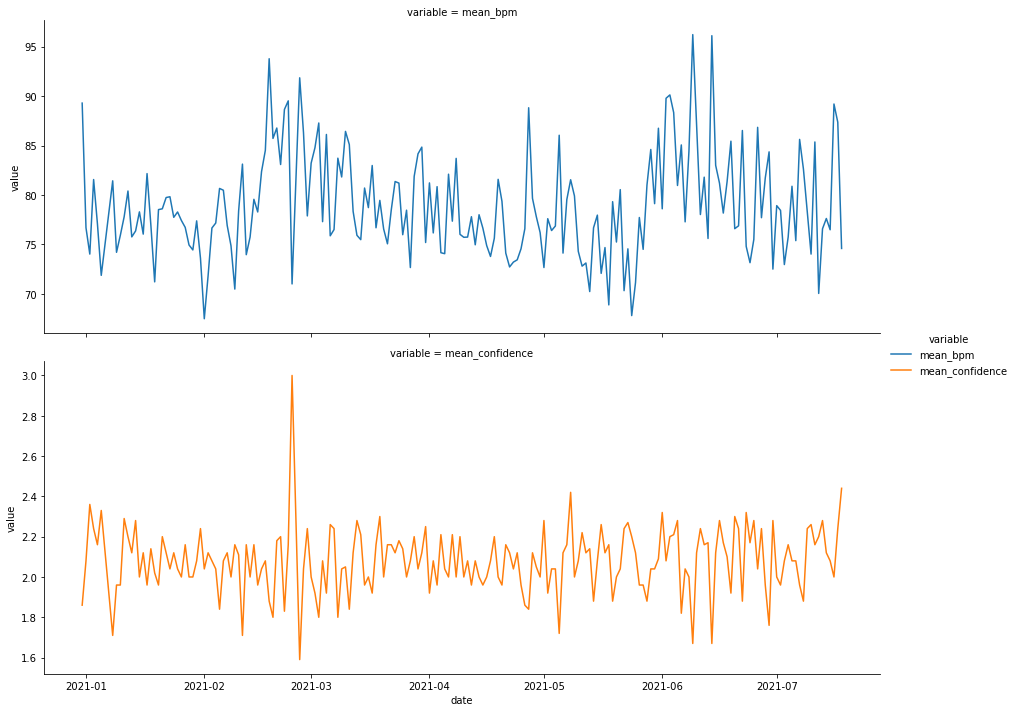

In [8]:
plot_df = df.melt(id_vars="date")
_ = sns.relplot(data=plot_df, x="date", y="value", hue="variable",
                row="variable", facet_kws={"sharey":False},
                kind="line", aspect=2.5)